# Color Classification

In [1]:
!pip install opencv-python


[notice] A new release of pip available: 22.3 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import os
import pandas as pd
import numpy as np
import cv2
from mpl_toolkits import mplot3d
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

[[[255 102  51]
  [255 102  51]
  [255 102  51]
  ...
  [255 102  51]
  [255 102  51]
  [255 102  51]]

 [[255 102  51]
  [255 102  51]
  [255 102  51]
  ...
  [255 102  51]
  [255 102  51]
  [255 102  51]]

 [[255 102  51]
  [255 102  51]
  [255 102  51]
  ...
  [255 102  51]
  [255 102  51]
  [255 102  51]]

 ...

 [[255 102  51]
  [255 102  51]
  [255 102  51]
  ...
  [255 102  51]
  [255 102  51]
  [255 102  51]]

 [[255 102  51]
  [255 102  51]
  [255 102  51]
  ...
  [255 102  51]
  [255 102  51]
  [255 102  51]]

 [[255 102  51]
  [255 102  51]
  [255 102  51]
  ...
  [255 102  51]
  [255 102  51]
  [255 102  51]]]


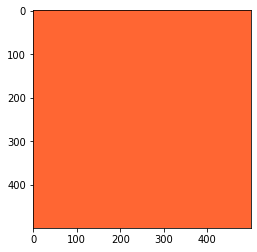

In [3]:
citra = cv2.cvtColor(cv2.imread('./data_coba/orange.png'), cv2.COLOR_BGR2RGB)
print(citra)
plt.imshow(citra)

In [4]:
rgb = []
color = []

for dirname, _, filenames in os.walk('./training_dataset'):
    for filename in filenames:
        image = cv2.cvtColor(cv2.imread(os.path.join(dirname, filename)), cv2.COLOR_BGR2RGB)
        rgb.append(image[0][0])
        color.append(dirname[19:])
       

In [5]:
rgb_df = pd.DataFrame(np.array(rgb), columns=['red', 'green', 'blue'])
rgb_df.head()

,red,green,blue
0,10,5,2
1,17,0,17
2,29,24,23
3,0,0,1
4,13,13,11


In [6]:
color_df = pd.DataFrame(
    {
        'color': color
    }
)

color_df.head()

,color
0,black
1,black
2,black
3,black
4,black


In [7]:
df = rgb_df.join(color_df)
df.head()

,red,green,blue,color
0,10,5,2,black
1,17,0,17,black
2,29,24,23,black
3,0,0,1,black
4,13,13,11,black


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473 entries, 0 to 472
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   red     473 non-null    uint8 
 1   green   473 non-null    uint8 
 2   blue    473 non-null    uint8 
 3   color   473 non-null    object
dtypes: object(1), uint8(3)
memory usage: 5.2+ KB


In [9]:
df['color'].nunique()

10

In [10]:
red = df['red']
green = df['green']
blue = df['blue']

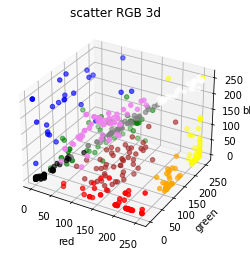

In [11]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(red, green, blue, c=df['color'])
ax.set(title='scatter RGB 3d',
      xlabel='red',
      ylabel='green',
      zlabel='blue')
plt.show()

In [12]:
X = df.iloc[:, 0:3]
y= df.iloc[:, -1]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [14]:
y_train.count()

331

In [15]:
y_test.count()

142

In [16]:
y_train.value_counts()

grey      38
red       37
brown     37
violet    36
green     35
yellow    34
white     34
orange    33
black     33
blue      14
Name: color, dtype: int64

In [17]:
y_test.value_counts()

black     17
orange    17
yellow    16
green     15
violet    14
white     14
brown     13
red       13
grey      12
blue      11
Name: color, dtype: int64

In [18]:
k = 30
neighbors = []
accuracy = []

for i in range(k):
    knn = KNeighborsClassifier(n_neighbors=i+1, weights='distance', metric='euclidean')
    knn = knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    neighbors.append(i+1)
    accuracy.append(accuracy_score(y_test, y_pred))

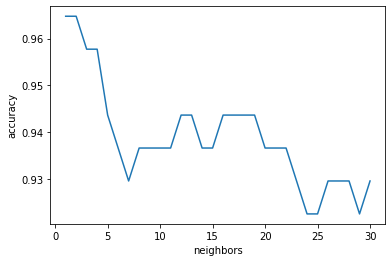

In [19]:
plt.plot(neighbors, accuracy)
plt.xlabel('neighbors')
plt.ylabel('accuracy')
plt.show()

In [20]:
accuracy_df = pd.DataFrame(
    {
        'neighbors': neighbors,
        'accuracy': accuracy
    }
)

accuracy_df.head(5)

,neighbors,accuracy
0,1,0.964789
1,2,0.964789
2,3,0.957746
3,4,0.957746
4,5,0.943662


In [21]:
knn = KNeighborsClassifier(n_neighbors=3, weights='distance', metric='euclidean')
knn = knn.fit(X_train, y_train)

In [22]:
y_pred = knn.predict(X_test)

In [23]:
pd.DataFrame(
    {
        'y_actual': y_test,
        'y_predict': y_pred
    }
)

,y_actual,y_predict
102,brown,brown
76,brown,brown
21,black,black
336,violet,violet
186,grey,grey
...,...,...
64,blue,blue
418,white,white
200,grey,grey
81,brown,brown


In [24]:
accuracy_score(y_test, y_pred)

0.9577464788732394

In [25]:
print(X_test.head())

     red  green  blue
102  159     92    24
76    89     60    57
21     0      0     4
336  164     66   160
186  149    145   140


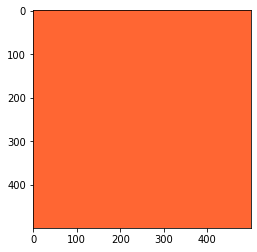

In [26]:
citra = cv2.cvtColor(cv2.imread('./data_coba/orange.png'), cv2.COLOR_BGR2RGB)
plt.imshow(citra)

In [27]:
rgb2 = []
image = cv2.cvtColor(cv2.imread('./data_coba/orange.png'), cv2.COLOR_BGR2RGB)

# for dirname, _, filename in os.walk('F:/CapstoneTA/coba_color/coba1/data_coba'):
#     print(filename[0])
#     image = cv2.cvtColor(cv2.imread(os.path.join(dirname[0], filename[0])), cv2.COLOR_BGR2RGB)
#     print(os.path.join(dirname[0], filename[0]))
rgb2.append(image[0][0])

print(rgb2)

[array([255, 102,  51], dtype=uint8)]


In [28]:
rgb_df2 = pd.DataFrame(np.array(rgb2), columns=['red', 'green', 'blue'])
rgb_df2.head()

,red,green,blue
0,255,102,51


In [29]:
y_pred2 = knn.predict(rgb_df2)

In [30]:
print(y_pred2)

['orange']


In [31]:
import pickle

filename = 'model.pkl'
pickle.dump(knn, open(filename, 'wb'))

In [32]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict(rgb_df2)
print(result)

['orange']
